### EDA on Loan Data obtained from Lending Club


**Data Description:** We have been provided data from the Lending Club which is an online marketplace for loans. The data contains information on past loans and whether they have been paid vs defaulted. The data contains various consumer attributes and loan attributes and other variables related to the loans.

**Business Problem**:

We have to conduct an exploratory data analysis on this dataset. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. We need to isloate the driving factors behind the default i.e. variables that are strong indicators of default. 

**Structure of the Anlaysis**:
The analysis will follow the below outlined rough structure. Not all steps may be in order since EDA is an iterative process. However, below is what we have covered in this exercise. 

**1. Data Familiarization**
   - Data volume
   - Check what level the data is at (primary keys)
   - Columns and their data types
   - Check data spread
   - Numeric vs Categorical Columns   

**2. Data Cleaning & Treatment**
   - Do an overall data check to remove duplicate records
   - Remove unnecessary, incorrect, and summary rows
   - Check null values
   - Delete irrelevant features
   - Impute null values
   - Sanity Checks
   - Outlier removal
   - Fix column formats   

**3. Data Content Analysis**
   - Univariate Analysis
   - Bivariate Analysis
   - Correlation b/w features

**4. Derived Features/Metrics**

**5. Recommendation**

In [150]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Data Familiarization
- Data volume
- Columns and their data types
- Check data spread
- Numeric vs Categorical Columns   

In [151]:
# Let's import the data into a pandas dataframe. SInce, it is a large dataset, using low_memory=False
# to allow enough memory allocation for right column format determination.
df = pd.read_csv("loan.csv",low_memory=False)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [152]:
# Our data has over 39K records and 111 columns.
df.shape

(39717, 111)

In [153]:
# Let's set these options as there are large number of columns so there will be no condensing of outputs
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [154]:
# Let's check the overall contents of the data
# Since there are too many columns, using verbose=True to display their formats
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

Most of the fields seem to have the right formats as seen above. Some seem mis-formatted and we will fix them later.

In [155]:
# Checking the level (primary keys) of the data.
print(df['id'].nunique())
print(df['member_id'].nunique())

39717
39717


Since the above two columns have only unique values, the data is on those levels. That is, each record corresponds to 1 loan and 1 customer. This is good to know and may not add value to this analysis.

Now, getting a rough idea of categorical columns. This is not fully accurate but assuming, for now, that all columns with dtype 'object' are categorical. There are some 'int' columns which may be categorical as well. Later, we will explore those too.

In [156]:
categ_fields = list(df.select_dtypes(include='object'))
categ_fields

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [157]:
# Now, since we know the target variable, let's first check its values. 
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

Above, we see that 1140 loans are current i.e. open. They have neither been fully paid nor defaulted.
Hence, they are not relevant to our analysis and we will drop them. After this steps, we are left with 38.5K records in our data.

In [158]:
df2 = df[df['loan_status']!='Current']
print(df2.shape)
print("\n")
print(df2['loan_status'].value_counts())

(38577, 111)


Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64


### 2. Data Cleaning & Treatment

We will be doing the following checks and treatments.

**1. Overall Data Check**
   - Delete duplicate records
   - Delete unnecessary/incorrect rows
   - Delete summary rows
   - Delete extra rows
   - Add column names if missing   
   - Check for bad column names, encoded/cryptic columns and rename them

**2. Column Wise Check**
   - Judge which columns are irrelevant or useless. We will drop them.
   - Judge which columns seem to have garbage values like all zeros or 999s, etc. and drop them
   - See which columns seem to have just one value; they won't be useful
   - Columns which have all unique values won't useful either (like id)
   - Fix missing values
   - Fix column formats
   - Do sanity checks
   - Outlier detection & removal

We will first check for duplicate records and remove them.

In [159]:
df2 = df2.drop_duplicates()
df2.shape

(38577, 111)

No duplicate records were found and removed.

Observing the top and bottom of the data as shown below, we don't see any header or footer rows, any total or subtotal rows, column number indicator rows, balnks rows, rows having anything other than relevant data. So we will not be doing any treatment here.

In [160]:
df2

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Looking at the result of the info() operation done above in the notebook, we don't see any columns with incorrect names. Example, no numbered columns, encoded column names, cryptic names, etc. Header row isn't missing and all columns names look fine in general.

Now, irrelevant or useless columns for this analysis

In [161]:
# Dropping the first two columns as they are loan id & customer id and not useful to the analysis
df2 = df2.drop(['id','member_id'],axis=1)

In [162]:
# The 'emp_title' column has too many unique values and those values don't make any logical sense
# So dropping this column
print(df2['emp_title'].nunique())
print("\n")
print(df2['emp_title'].value_counts())
df2 = df2.drop(['emp_title'],axis=1)

28027


US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: emp_title, Length: 28027, dtype: int64


In [163]:
# The column 'pymnt_plan' has only one value so dropping this column as well.
# Column 'url' has the URL of the loan record so not useful. Dropping.
# Column 'desc' has long text descriptions of the loan as provided by the borrower. This could have been
# useful for text mining but that is beyond the scope now. So dropping this too.

print(df2['pymnt_plan'].value_counts())
df2 = df2.drop(['pymnt_plan','url','desc'],axis=1)

n    38577
Name: pymnt_plan, dtype: int64


In [164]:
# 'title' column is also mostly junk data with too many unique values. The useful information is already
# captured in the 'purpose' column. So dropping 'title'.
print(df2['title'].value_counts())
df2 = df2.drop(['title'],axis=1)

Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
                             ... 
Murray Loan                     1
Need debt consolidation!        1
freedom2                        1
DAVE WEDDING                    1
JAL Loan                        1
Name: title, Length: 19297, dtype: int64


In [165]:
# Column 'initial_list_status' has only one value so dropping.
print(df2['initial_list_status'].value_counts())
df2 = df2.drop(['initial_list_status'],axis=1)

f    38577
Name: initial_list_status, dtype: int64


In [166]:
# Columns 'out_prncp' and 'out_prncp_inv' are outstanding principal amounts so only populated for 
# current loans which we have already dropped. Now these columns have only zeros in them so dropping.
print(df2['out_prncp'].value_counts())
print(df2['out_prncp_inv'].value_counts())
df2 = df2.drop(['out_prncp','out_prncp_inv'],axis=1)

0.0    38577
Name: out_prncp, dtype: int64
0.0    38577
Name: out_prncp_inv, dtype: int64


In [167]:
# The below columns indicate data that was obtained after loan was approved and funded
# This information wouldn't have been available at the time of loan application
# So won't be useful for our analysis and should be dropped.  
df2 = df2.drop(['funded_amnt','funded_amnt_inv','installment','total_pymnt','total_pymnt_inv',\
                'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',\
                'collection_recovery_fee','last_pymnt_d','int_rate',\
                'last_pymnt_amnt','next_pymnt_d','revol_bal','revol_util'],axis=1)

In [168]:
# The below columns have just one value so not useful, hence, dropping them.

print(df2['collections_12_mths_ex_med'].value_counts())
print(df2['policy_code'].value_counts())
print(df2['application_type'].value_counts())
print(df2['acc_now_delinq'].value_counts())
print(df2['chargeoff_within_12_mths'].value_counts())
print(df2['delinq_amnt'].value_counts())
print(df2['tax_liens'].value_counts())

df2 = df2.drop(['collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq',\
                'chargeoff_within_12_mths','delinq_amnt','tax_liens'],axis=1)

0.0    38521
Name: collections_12_mths_ex_med, dtype: int64
1    38577
Name: policy_code, dtype: int64
INDIVIDUAL    38577
Name: application_type, dtype: int64
0    38577
Name: acc_now_delinq, dtype: int64
0.0    38521
Name: chargeoff_within_12_mths, dtype: int64
0    38577
Name: delinq_amnt, dtype: int64
0.0    38538
Name: tax_liens, dtype: int64


In [169]:
# The column 'last_credit_pull_d' and 'issue_d' are dates of last credit pull and loan issue respectively.
# Column 'earliest_cr_line' is also date of first opeing of a credit line.
# Using business logic, these shouldn't be the judge of default. We should only look at relevant metrics.
# Their dates won't help with future loan decisioning so dropping these columns.
df2 = df2.drop(['last_credit_pull_d','issue_d','earliest_cr_line'],axis=1)

In [170]:
len(df2.columns)

75

### Now, from the remaining data, we will study all columns and rows for missing values.

In [171]:
# Missing value percentage in each column
round(df2.isnull().sum()/len(df2),3)*100

loan_amnt                           0.0
term                                0.0
grade                               0.0
sub_grade                           0.0
emp_length                          2.7
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
loan_status                         0.0
purpose                             0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0
delinq_2yrs                         0.0
inq_last_6mths                      0.0
mths_since_last_delinq             64.6
mths_since_last_record             92.9
open_acc                            0.0
pub_rec                             0.0
total_acc                           0.0
mths_since_last_major_derog       100.0
annual_inc_joint                  100.0
dti_joint                         100.0
verification_status_joint         100.0
tot_coll_amt                      100.0


A large number of columns have large percentage of missing values. Overall, the missing values range from 0.1% to 100%. Also, a column either has very less missing values (up to 2.7%) or very high missing 
values (>60%).

In [172]:
# We will drop all columns with high missing values. Going with 10% as dummy threshold to isolate 
# those columns.
drop_cols = df2.columns[100*(df2.isnull().sum()/len(df2)) > 10]
print("Number of columns with high missing values = ",len(drop_cols))
print("\n List of columns to drop ->\n")
print(drop_cols)

Number of columns with high missing values =  56

 List of columns to drop ->

Index(['mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_

In [173]:
# Dropping these 56 columns
df2 = df2.drop(drop_cols,axis=1)
print(df2.shape)

(38577, 19)


In [174]:
# Rechecking missing value percentage in each column
round(df2.isnull().sum()/len(df2),3)*100

loan_amnt               0.0
term                    0.0
grade                   0.0
sub_grade               0.0
emp_length              2.7
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
delinq_2yrs             0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
total_acc               0.0
pub_rec_bankruptcies    1.8
dtype: float64

In [175]:
# We just have two columns left with missing data
# Let's start with missing value treatment of column 'emp_length'
# Seems like a categorical field by visual inspection so let's check the values.
df2['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [176]:
# Imputing missing values with mode
print(df2['emp_length'].mode())
df2['emp_length'] = df2['emp_length'].fillna(df2['emp_length'].mode()[0])

0    10+ years
dtype: object


In [177]:
# Recheck missing values
df2['emp_length'].isnull().sum()

0

In [178]:
# Now, the next column with missing values is 'pub_rec_bankruptcies' which is the number of bankruptcies in 
# the public record. This should be categorical, checking values to confirm.
df2['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [179]:
# Clearly, Zero is the mode here so filling the missing values with Zero.
df2['pub_rec_bankruptcies'] = df2['pub_rec_bankruptcies'].fillna(0)
df2['pub_rec_bankruptcies'].value_counts()

0.0    36935
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [180]:
# Checking for missing values again
df2.isnull().sum()

loan_amnt               0
term                    0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
delinq_2yrs             0
inq_last_6mths          0
open_acc                0
pub_rec                 0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

No more mssing values are left in the data. Missing value treatment ends.

In [181]:
# Let's check for remaining column formats
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   term                  38577 non-null  object 
 2   grade                 38577 non-null  object 
 3   sub_grade             38577 non-null  object 
 4   emp_length            38577 non-null  object 
 5   home_ownership        38577 non-null  object 
 6   annual_inc            38577 non-null  float64
 7   verification_status   38577 non-null  object 
 8   loan_status           38577 non-null  object 
 9   purpose               38577 non-null  object 
 10  zip_code              38577 non-null  object 
 11  addr_state            38577 non-null  object 
 12  dti                   38577 non-null  float64
 13  delinq_2yrs           38577 non-null  int64  
 14  inq_last_6mths        38577 non-null  int64  
 15  open_acc           

In [182]:
# One columns need to be fixed - 'zip_code'

In [183]:
# Removing 'xx' from 'zip_code' values and leaving it as string.
print(df2['zip_code'].head(3))
df2['zip_code'] = df2['zip_code'].apply(lambda x: x.replace("xx",""))
print("\n")
print(df2['zip_code'].head(3))

0    860xx
1    309xx
2    606xx
Name: zip_code, dtype: object


0    860
1    309
2    606
Name: zip_code, dtype: object


The zip code is 3 digit which is incomplete but can still point to large areas like cities or counties
hence, not deleting this column.

In [184]:
df2

,loan_amnt,term,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
0,5000,36 months,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,860,AZ,27.65,0,1,3,0,9,0.0
1,2500,60 months,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,309,GA,1.00,0,5,3,0,4,0.0
2,2400,36 months,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,606,IL,8.72,0,2,2,0,10,0.0
3,10000,36 months,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,917,CA,20.00,0,1,10,0,37,0.0
5,5000,36 months,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,852,AZ,11.20,0,3,9,0,12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,36 months,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Fully Paid,home_improvement,802,CO,11.33,0,0,13,0,40,0.0
39713,8500,36 months,C,C1,3 years,RENT,18000.0,Not Verified,Fully Paid,credit_card,274,NC,6.40,1,1,6,0,9,0.0
39714,5000,36 months,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Fully Paid,debt_consolidation,017,MA,2.30,0,0,11,0,20,0.0
39715,5000,36 months,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Fully Paid,other,208,MD,3.72,0,0,17,0,26,0.0


### Checked the data at this point and didn't find any need to standardize units, scale values, convert to ratios or percentages, etc. But since we will need to look at default rates across segments, we will need to bucket the numerical variables. Let's do sanity checks first and then bucket.

Sanity checks with remaining data

In [185]:
# Can't be negative
df2['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [186]:
# Shouldn't be negative or more than 100%
df2['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [187]:
# Shouldn't be negative
df2['delinq_2yrs'].value_counts()

0     34386
1      3207
2       673
3       212
4        60
5        21
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

In [188]:
# Shouldn't be negative
df2['inq_last_6mths'].value_counts()

0    18709
1    10660
2     5654
3     2983
4      316
5      144
6       63
7       34
8       14
Name: inq_last_6mths, dtype: int64

In [189]:
# Shouldn't be negative or insanely high
df2['open_acc'].value_counts()

7     3909
6     3846
8     3814
9     3607
5     3111
10    3097
11    2666
4     2300
12    2198
13    1855
3     1470
14    1427
15    1146
16     908
17     716
2      596
18     516
19     384
20     281
21     235
22     137
23      93
24      75
25      53
26      34
28      24
27      22
30      15
29      13
31       7
34       5
35       4
32       3
33       3
36       2
39       1
38       1
44       1
41       1
42       1
Name: open_acc, dtype: int64

In [190]:
# Shouldn't be negative
df2['pub_rec'].value_counts()

0    36507
1     2013
2       48
3        7
4        2
Name: pub_rec, dtype: int64

In [191]:
# Shouldn't be negative
df2['pub_rec_bankruptcies'].value_counts()

0.0    36935
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

 In summary, we didn't find any data sanity issues

### Outlier detection and removal.

In [192]:
df2.columns

Index(['loan_amnt', 'term', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

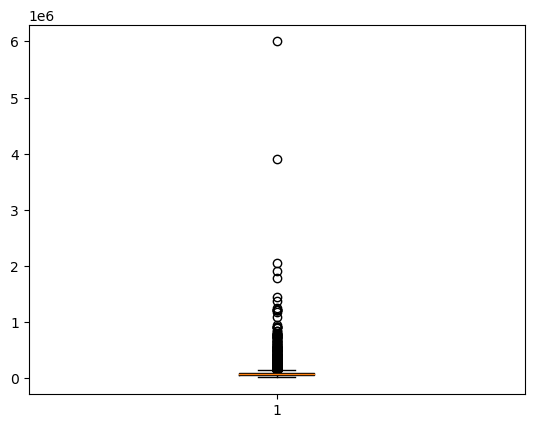

In [193]:
# Sarting with annual income - it seems to have a lot of outliers
plt.boxplot(df2['annual_inc'])
plt.show()

In [194]:
# Removing severe outliers using a cut-off of half a million 
print(len(df2[df2['annual_inc']>=500000]))
df2 = df2[df2['annual_inc']<500000]

71


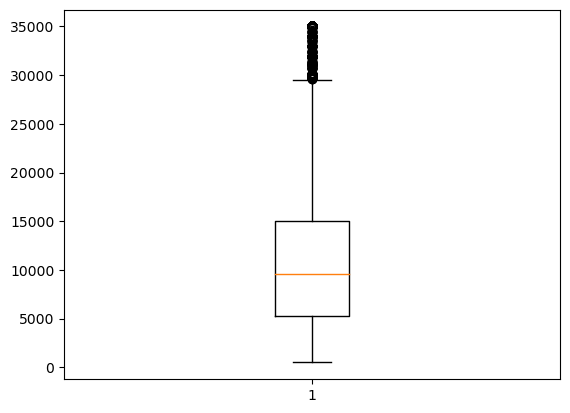

In [195]:
# No severe outliers are visible in loan amount
plt.boxplot(df2['loan_amnt'])
plt.show()

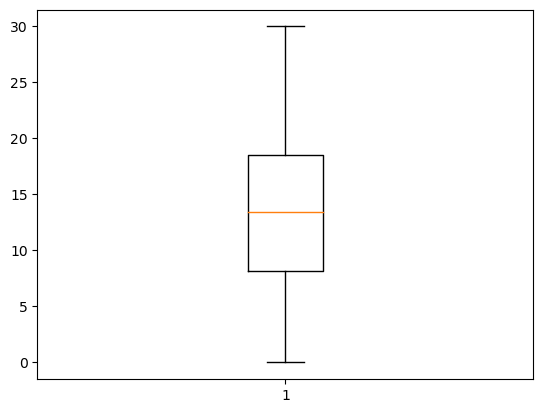

In [196]:
# No outliers in 'dti'
plt.boxplot(df2['dti'])
plt.show()

### Univariate Analysis

In [197]:
# Creating a new dataset to work on the next steps
df3 = df2.copy()

In [198]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38506 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38506 non-null  int64  
 1   term                  38506 non-null  object 
 2   grade                 38506 non-null  object 
 3   sub_grade             38506 non-null  object 
 4   emp_length            38506 non-null  object 
 5   home_ownership        38506 non-null  object 
 6   annual_inc            38506 non-null  float64
 7   verification_status   38506 non-null  object 
 8   loan_status           38506 non-null  object 
 9   purpose               38506 non-null  object 
 10  zip_code              38506 non-null  object 
 11  addr_state            38506 non-null  object 
 12  dti                   38506 non-null  float64
 13  delinq_2yrs           38506 non-null  int64  
 14  inq_last_6mths        38506 non-null  int64  
 15  open_acc           

In [199]:
# Converting the target variable to numeric form for easier analysis and storing the output in a new column
# Now we have a 'bad' indicator column
print(df3['loan_status'].value_counts())
df3['default'] = df3['loan_status'].apply(lambda x: 1 if x=="Charged Off" else 0)
print("\n")
print(df3['default'].value_counts())

Fully Paid     32890
Charged Off     5616
Name: loan_status, dtype: int64


0    32890
1     5616
Name: default, dtype: int64


### Univariate Analysis for Categorical Variables

In [200]:
# For this analysis, we will calculate the default rate.
# First, overall default rate
round((df3['default'].mean())*100,1)

14.6

Above code gives us a 14.6% or ~15% default rate on the overall population of loans. Any segment with higher default rate than this is of concern to us.

term
 36 months    11.1
 60 months    25.3
Name: default, dtype: float64


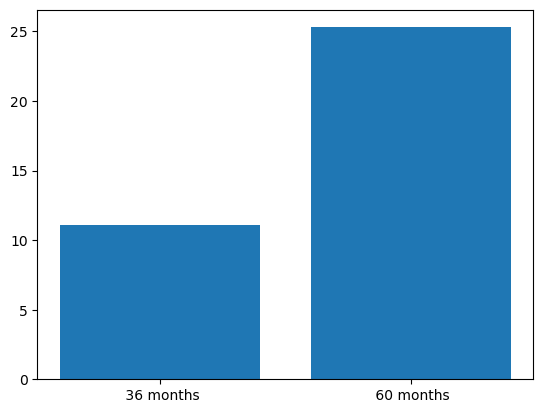

In [201]:
# Trying this exploratory method with Term of loan first. Will apply to other columns after.
gpb = round(df3.groupby(by='term')['default'].mean()*100,1)
print(gpb)
plt.bar(x=gpb.index,height=gpb.values)
plt.show()

The above exercise can be easier done using Seaborn's barplot which automatically average the y variable and hence will give us a default rate.

Plotting 'term' suggests short-term lons are quite safe while longer term loans have much higher chance of default.

Let's plot all categorical columns first and then give a collated opinion.

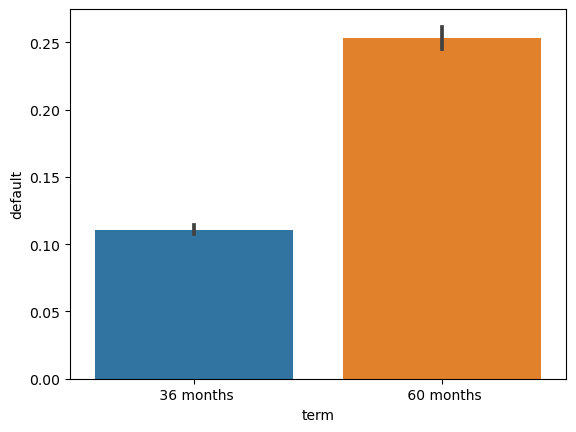

In [202]:
sns.barplot(data=df3,x='term',y='default')
plt.show()

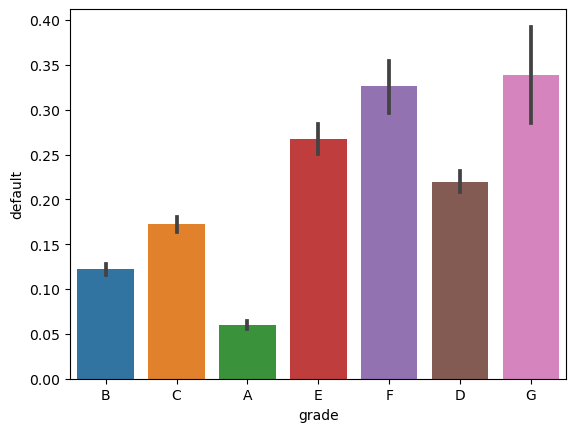

In [203]:
sns.barplot(data=df3,x='grade',y='default')
plt.show()

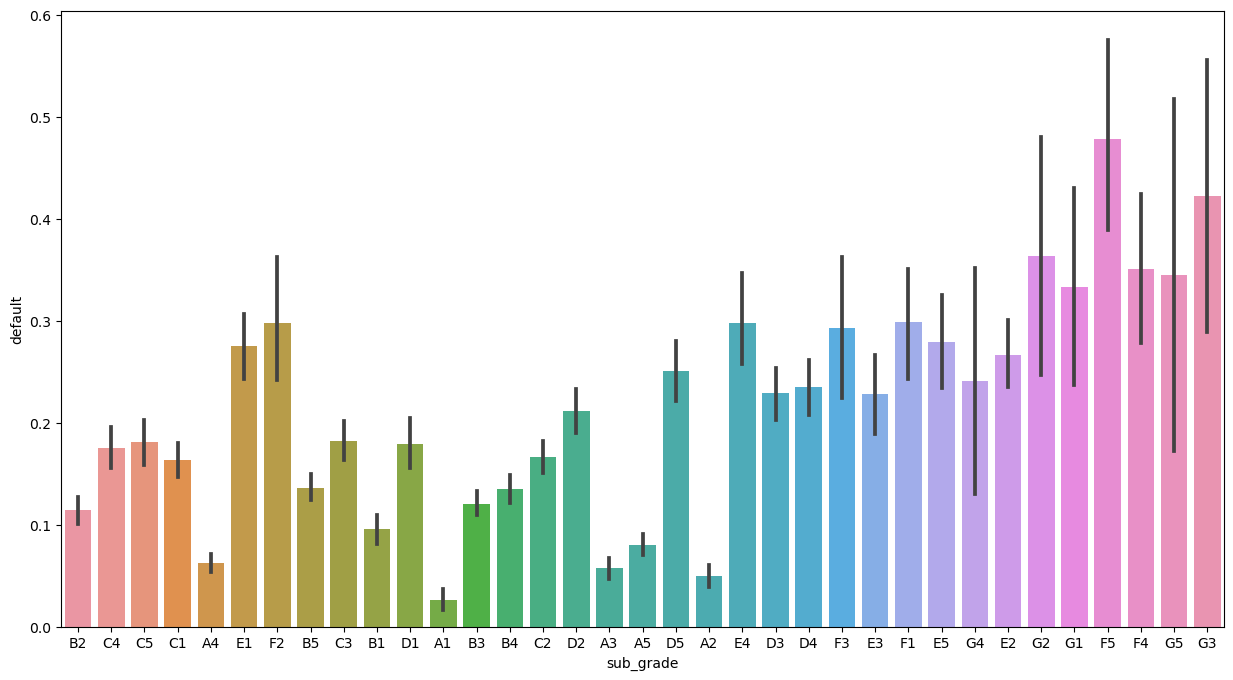

In [204]:
plt.figure(figsize=(15,8))
sns.barplot(data=df3,x='sub_grade',y='default')
plt.show()

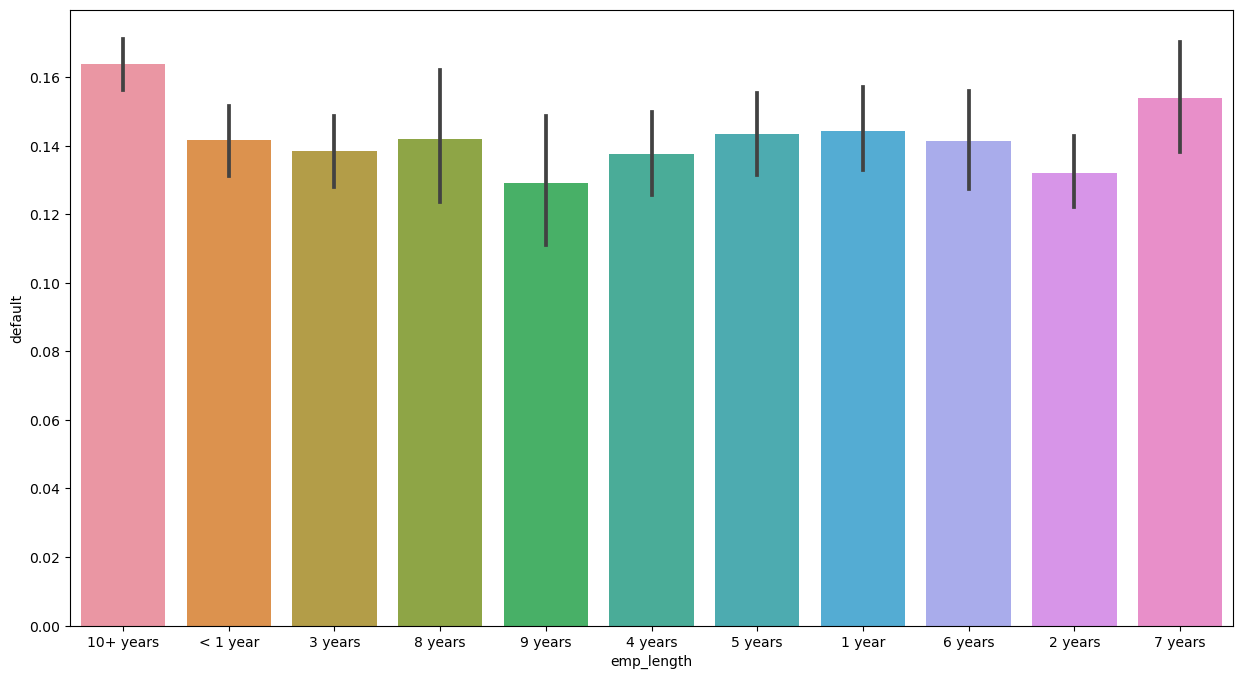

In [205]:
plt.figure(figsize=(15,8))
sns.barplot(data=df3,x='emp_length',y='default')
plt.show()

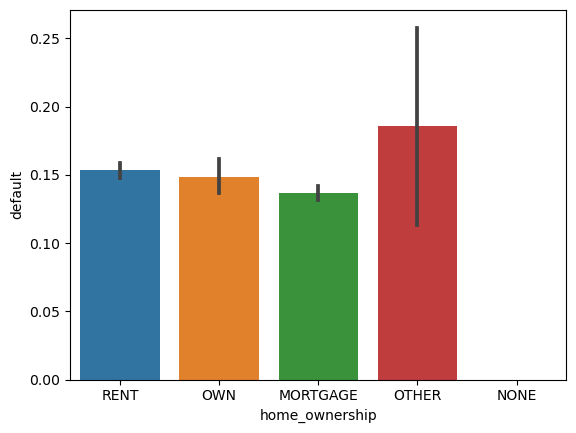

In [206]:
sns.barplot(data=df3,x='home_ownership',y='default')
plt.show()

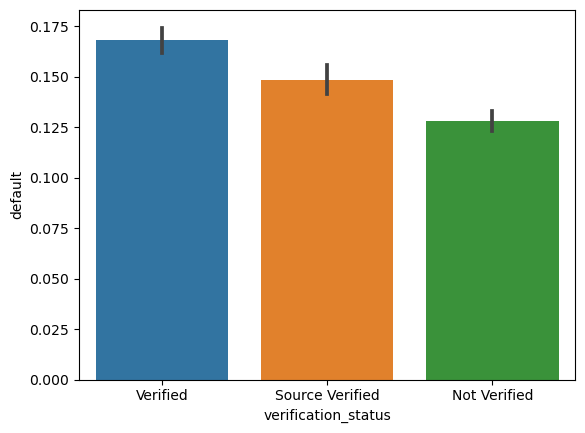

In [207]:
sns.barplot(data=df3,x='verification_status',y='default')
plt.show()

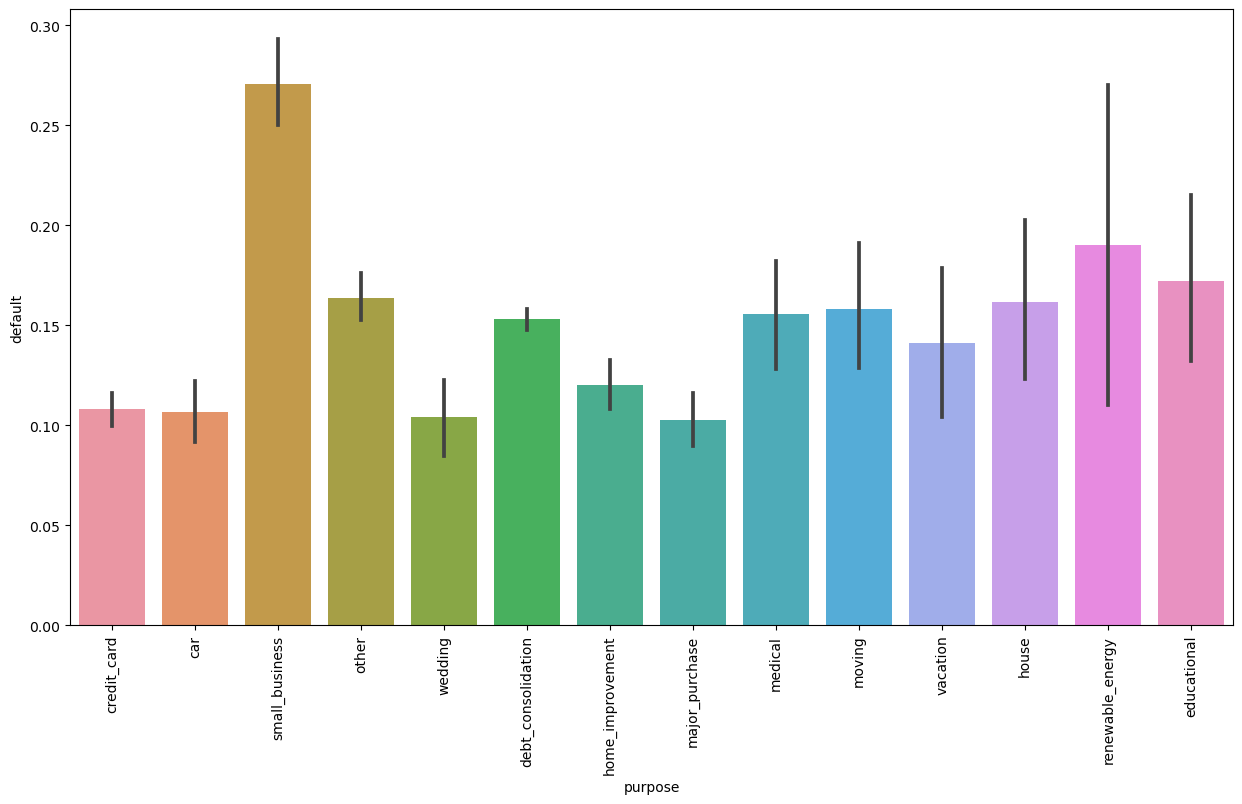

In [208]:
plt.figure(figsize=(15,8))
sns.barplot(data=df3,x='purpose',y='default')
plt.xticks(rotation=90)
plt.show()

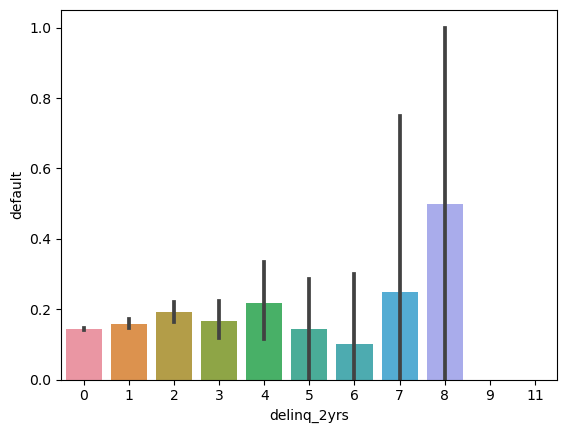

In [209]:
sns.barplot(data=df3,x='delinq_2yrs',y='default')
plt.show()

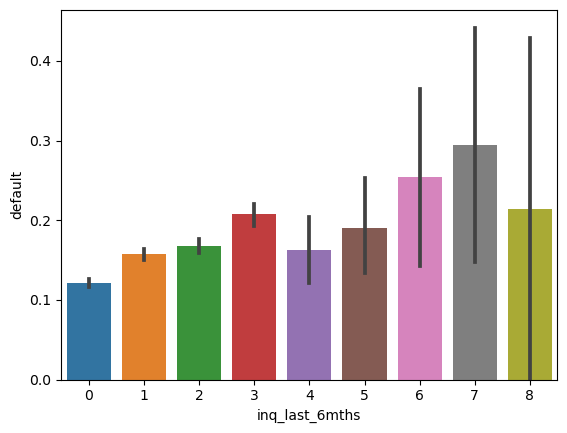

In [210]:
sns.barplot(data=df3,x='inq_last_6mths',y='default')
plt.show()

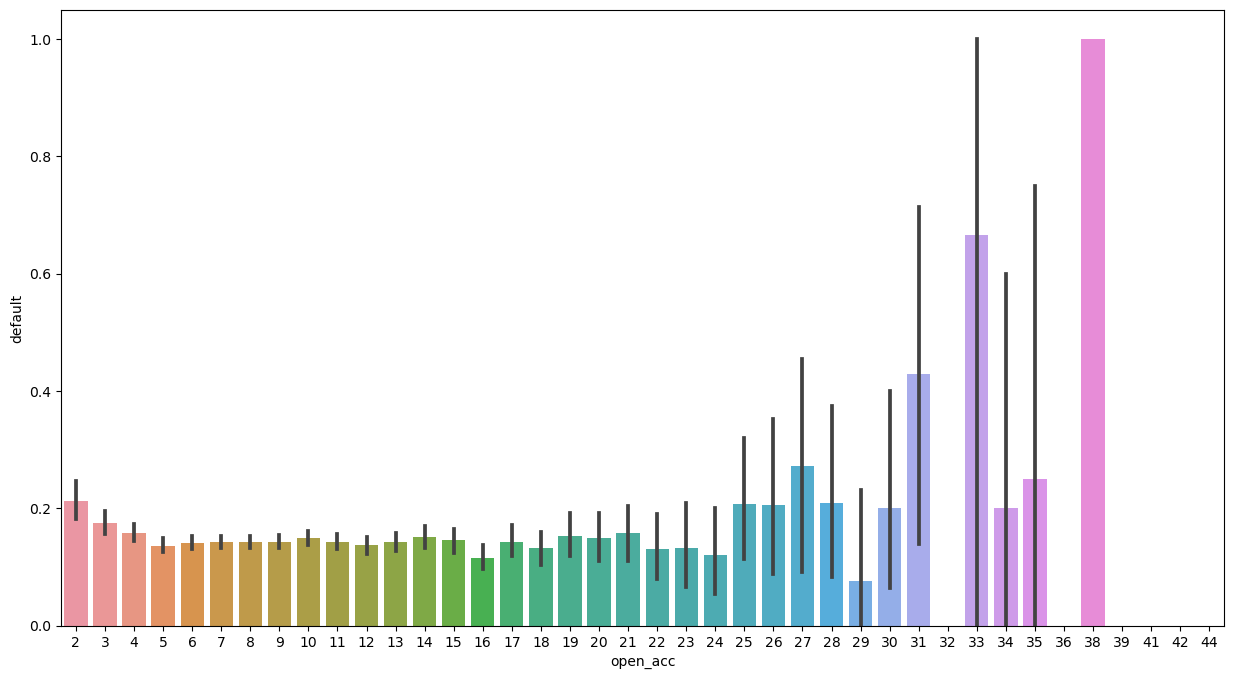

In [211]:
plt.figure(figsize=(15,8))
sns.barplot(data=df3,x='open_acc',y='default')
plt.show()

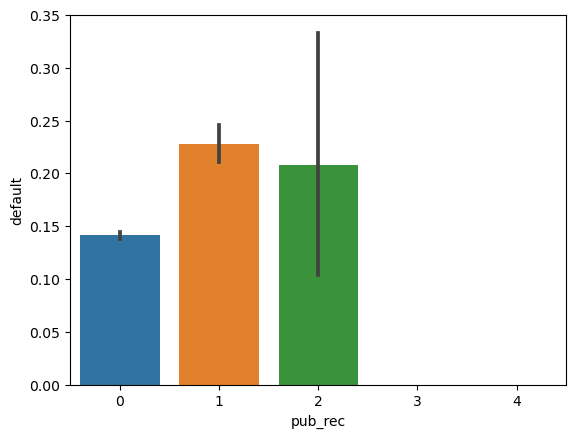

In [212]:
sns.barplot(data=df3,x='pub_rec',y='default')
plt.show()

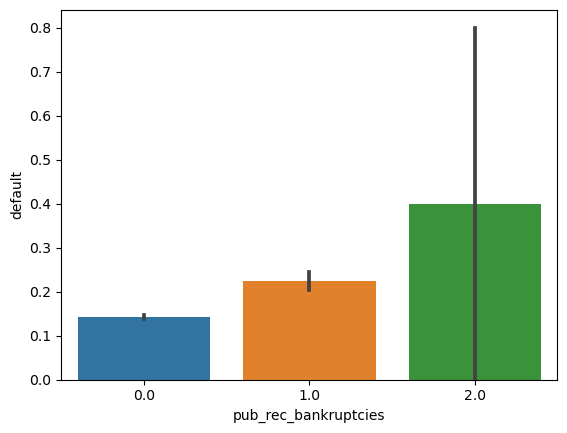

In [213]:
sns.barplot(data=df3,x='pub_rec_bankruptcies',y='default')
plt.show()


### Inferences from univariate analysis of categorical variables:
1. 60-month loans are at much higher risk of default compared to 30-month loans.
2. Loans with grade E onwards are riskier.
3. Within subgrades, as the number of grade increases, the loans become riskier.
4. Employee length and Home ownership do not show any remarkable readings.
5. Verified loans have slightly higher risk than non verified but may not be significant.
6. Loans taken for small businesses are the riskiest followed by renewable energy and educational.
7. The more someone has been delinquent in past 2 years, more are they likely to default; especially 7 and above.
8. The more inquiries in last 6 months, more are they likely to default; especially 7 and above.
9. Higher number of open accounts suggest more risk. ANyone above 30 open accounts is very risky.
10. More derogatory or bankruptcy public records show more riskiness.

### Univariate Analysis for Numerical Variables

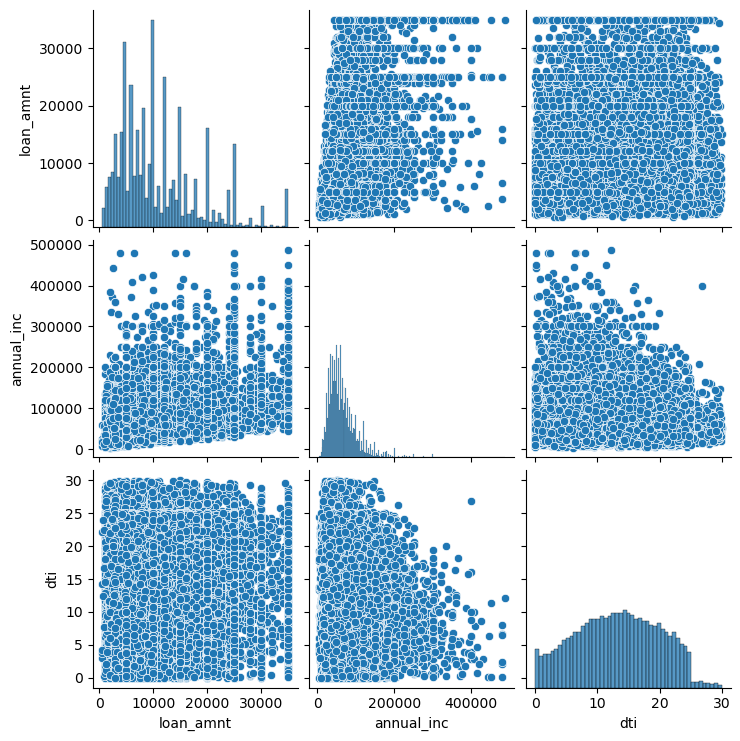

In [214]:
# Let's first look at the spread of the numerical variables
sns.pairplot(df3[['loan_amnt','annual_inc','dti']])
plt.show()

### Derived Metrics Creation
Since we need to plot out default rates across segments, let's create buckets out of the numerical variables and analyze them the same way as categorical variables.

Since this is just an EDA exercise, this should be fine. For modelling, we will need to use the actual numerical variables.

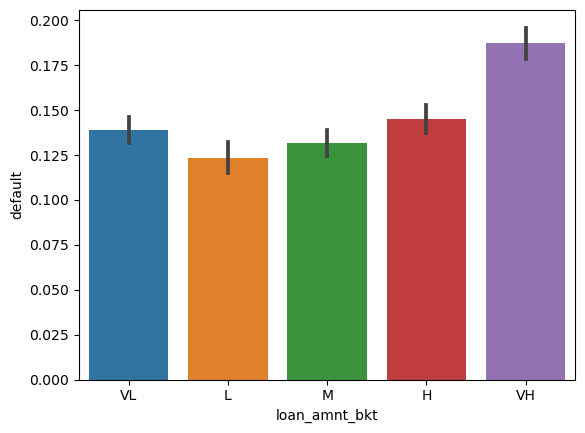

In [215]:
df3['loan_amnt_bkt'] = pd.qcut(df3['loan_amnt'],[0,0.2,0.4,0.6,0.8,1],['VL','L','M','H','VH'])
sns.barplot(data=df3,x='loan_amnt_bkt',y='default')
plt.show()

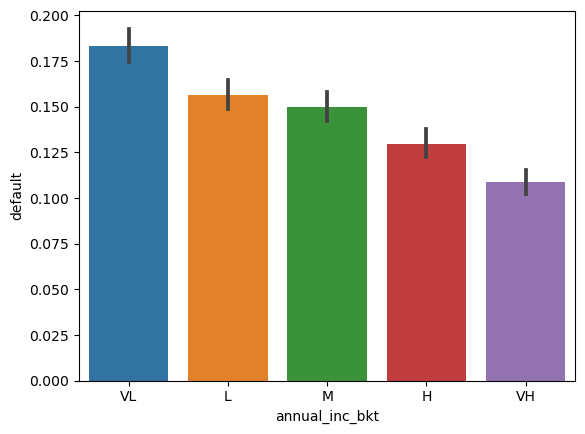

In [216]:
df3['annual_inc_bkt'] = pd.qcut(df3['annual_inc'],[0,0.2,0.4,0.6,0.8,1],['VL','L','M','H','VH'])
sns.barplot(data=df3,x='annual_inc_bkt',y='default')
plt.show()

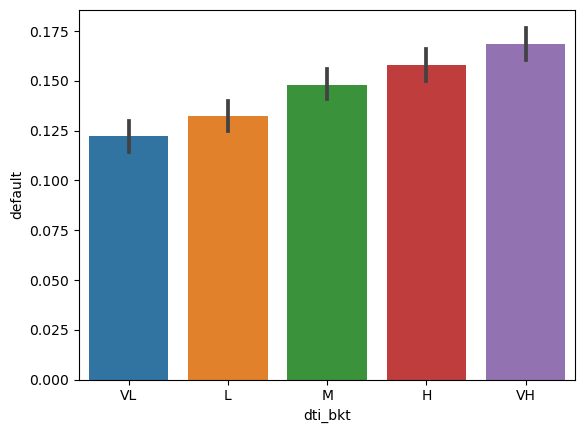

In [217]:
df3['dti_bkt'] = pd.qcut(df3['dti'],[0,0.2,0.4,0.6,0.8,1],['VL','L','M','H','VH'])
sns.barplot(data=df3,x='dti_bkt',y='default')
plt.show()

### Inferences from univariate analysis of numerical variables:
1. Up to a point, loan amount is not a predictor of risk. But very high loan amounts are riskier.
2. Lower the annual income, higher the risk. The company should be more careful with such loans.
3. Higher debt-to-income customers are riskier as expected.

# Bivariate analysis on logical pairs 

We will be using logical reasoning and best business judgment to pick paris to investigate for bivariate analysis. 

We will use the pivot table method to create a cross tab of default rates and then plot them as heatmaps.

Many pairs were looked at but only those showing significant results are shown below.

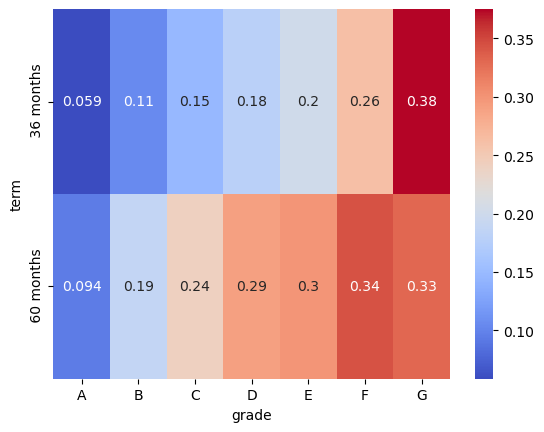

In [218]:
pt = pd.pivot_table(data=df3,index='term',columns='grade',values='default')
sns.heatmap(pt,cmap='coolwarm',annot=True)
plt.show()

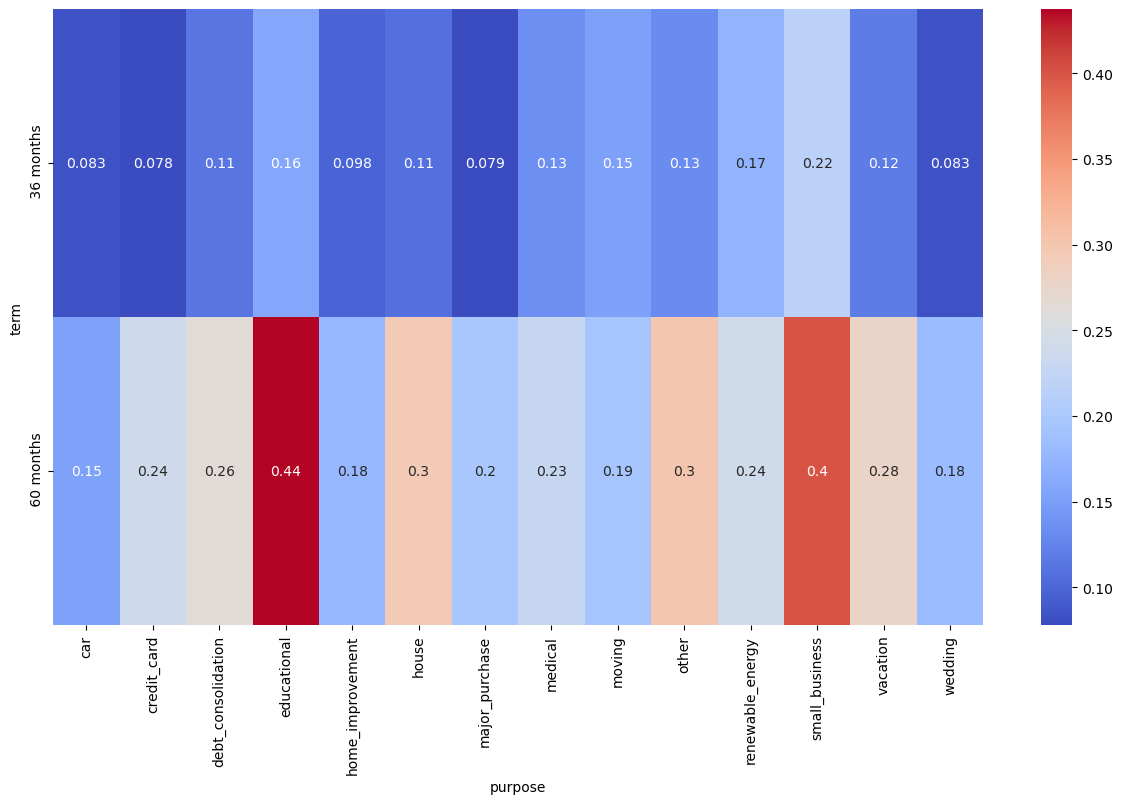

In [219]:
pt = pd.pivot_table(data=df3,index='term',columns='purpose',values='default')
plt.figure(figsize=(15,8))
sns.heatmap(pt,cmap='coolwarm',annot=True)
plt.show()

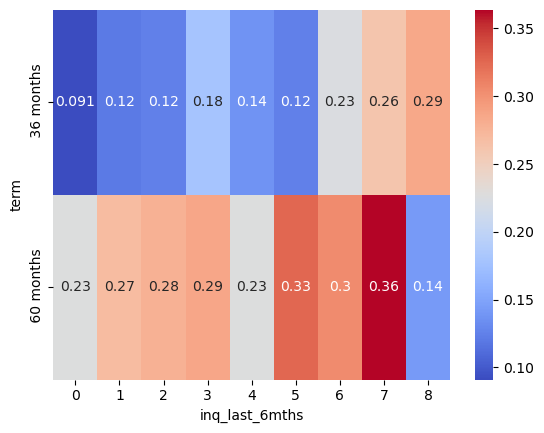

In [220]:
pt = pd.pivot_table(data=df3,index='term',columns='inq_last_6mths',values='default')
sns.heatmap(pt,cmap='coolwarm',annot=True)
plt.show()

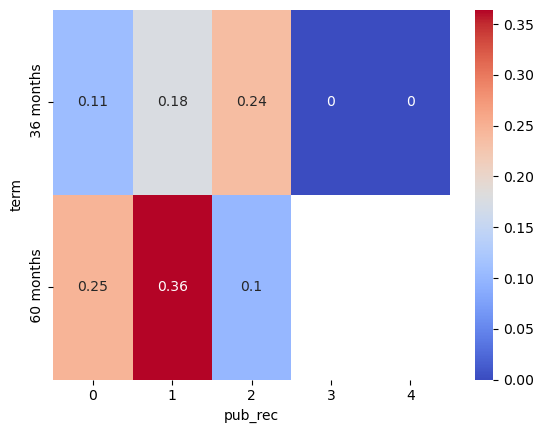

In [221]:
pt = pd.pivot_table(data=df3,index='term',columns='pub_rec',values='default')
sns.heatmap(pt,cmap='coolwarm',annot=True)
plt.show()

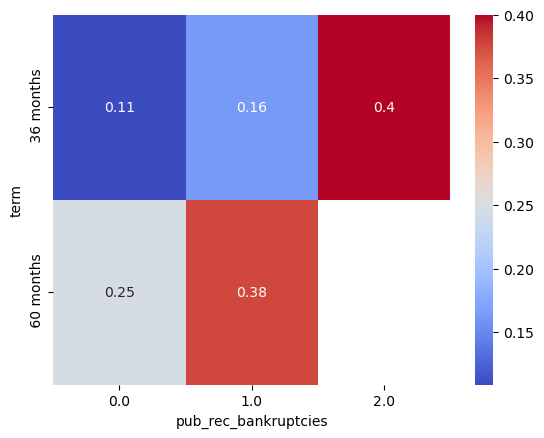

In [222]:
pt = pd.pivot_table(data=df3,index='term',columns='pub_rec_bankruptcies',values='default')
sns.heatmap(pt,cmap='coolwarm',annot=True)
plt.show()

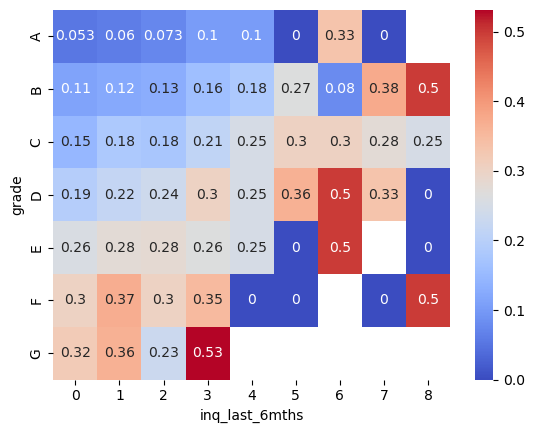

In [223]:
pt = pd.pivot_table(data=df3,index='grade',columns='inq_last_6mths',values='default')
sns.heatmap(pt,cmap='coolwarm',annot=True)
plt.show()

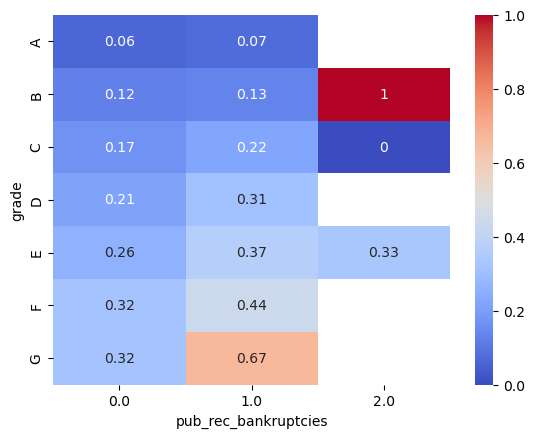

In [224]:
pt = pd.pivot_table(data=df3,index='grade',columns='pub_rec_bankruptcies',values='default')
sns.heatmap(pt,cmap='coolwarm',annot=True)
plt.show()

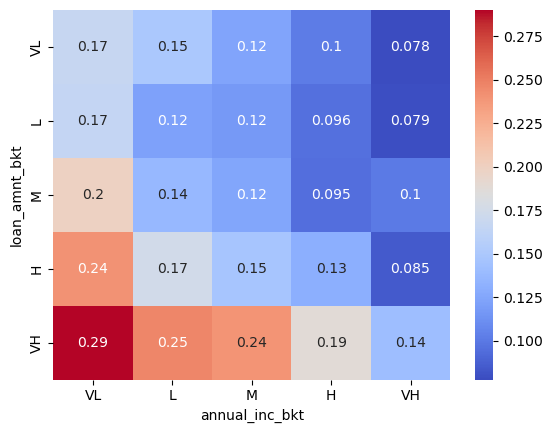

In [225]:
pt = pd.pivot_table(data=df3,index='loan_amnt_bkt',columns='annual_inc_bkt',values='default')
sns.heatmap(pt,cmap='coolwarm',annot=True)
plt.show()

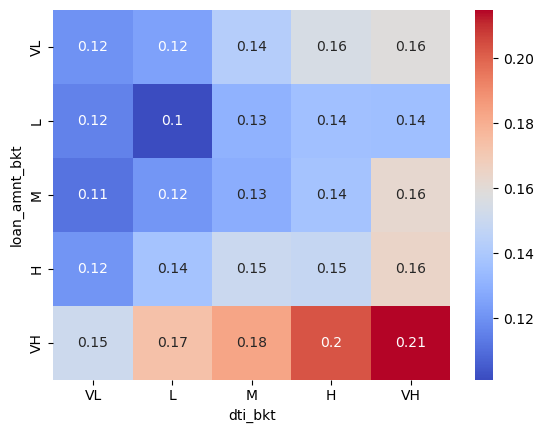

In [226]:
pt = pd.pivot_table(data=df3,index='loan_amnt_bkt',columns='dti_bkt',values='default')
sns.heatmap(pt,cmap='coolwarm',annot=True)
plt.show()

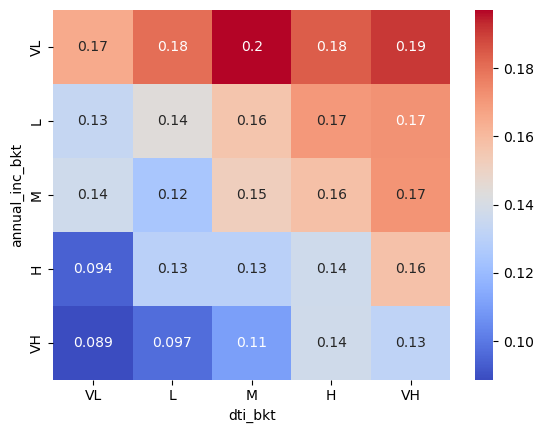

In [227]:
pt = pd.pivot_table(data=df3,index='annual_inc_bkt',columns='dti_bkt',values='default')
sns.heatmap(pt,cmap='coolwarm',annot=True)
plt.show()


### Inferences from bivariate analysis:
1. Even the lower loan term can be risky if combined with a bad grade loan.
2. More inquiries in general causes higher risk even in lower risk segments of other variables.
3. Same goes for derogatory public records and public record bankruptcies.
4. Also applicable to inquiries in last 6 months.
5. High loan amount combined with low annual income is very risky.
6. Also goes for high loan amount combined with high debt-to-income ratio.
7. Same for low annual income with high debt-to-income ratio.

# Final Summary

We see an overall 15% default rate which is arguably high and therefore, the business needs to be more careful in who it lends to. Below is a crisp summary of the conclusions indicating the most important variables and key recommendations to go by.

### Top variables which are predictors of default:
- Loan term
- Grade of loan
- Number of delinquencies
- Number of open accounts
- Number of public record bankruptcies
- Annual income
- Debt-to-income ratio


### Recommendations (use ROI based approval system)
- The company should be especially careful about its longer term loans.
- Loans with Grade E onwards are risky an should be reduced. 
- The more someone has been delinquent in past 2 years, more are they likely to default; especially 7 and above.
- The more inquiries in last 6 months, more are they likely to default; especially 7 and above.
- Higher number of open accounts suggest more risk. Anyone above 30 open accounts is very risky.
- More derogatory or bankruptcy public records show more riskiness.
- Very high loan amounts are risky along with lower annual income and high debt-to-income ratio.

These recommendations need to be weighed against business profits and an ROI based system should be created to approve loans. The above qualified risk factors should be combined with one another and the probability of default should be calculated (same as the default rate by segments). 

Using this probability of default, the return on investment of every loan judged and some criteria used for approval. We would recommned using an ROI cut-off of 3 to approve loans i.e. approve loans with ROI >= 3.

THE END :)